In [1]:
# Set up environment
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

pd.options.mode.chained_assignment = None

pd.set_option('display.max_columns', None)

# Read data
df = pd.read_csv(r'../input/ibm-hr-analytics-attrition-dataset/WA_Fn-UseC_-HR-Employee-Attrition.csv')
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,3,Male,41,4,2,Laboratory Technician,4,Married,2571,12290,4,Y,No,17,3,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,4,Male,42,2,3,Healthcare Representative,1,Married,9991,21457,4,Y,No,15,3,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,2,Male,87,4,2,Manufacturing Director,2,Married,6142,5174,1,Y,Yes,20,4,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,4,Male,63,2,2,Sales Executive,2,Married,5390,13243,2,Y,No,14,3,4,80,0,17,3,2,9,6,0,8


In [2]:
# Check data type and missing value
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [3]:
# Statistical overview
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,14313.103401,2.693197,15.209524,3.153741,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,1.102846,4707.956783,7117.786044,2.498009,3.659938,0.360824,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,8047.000000,1.000000,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,14235.500000,2.000000,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,4.000000,8379.000000,20461.500000,4.000000,18.000000,3.000000,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


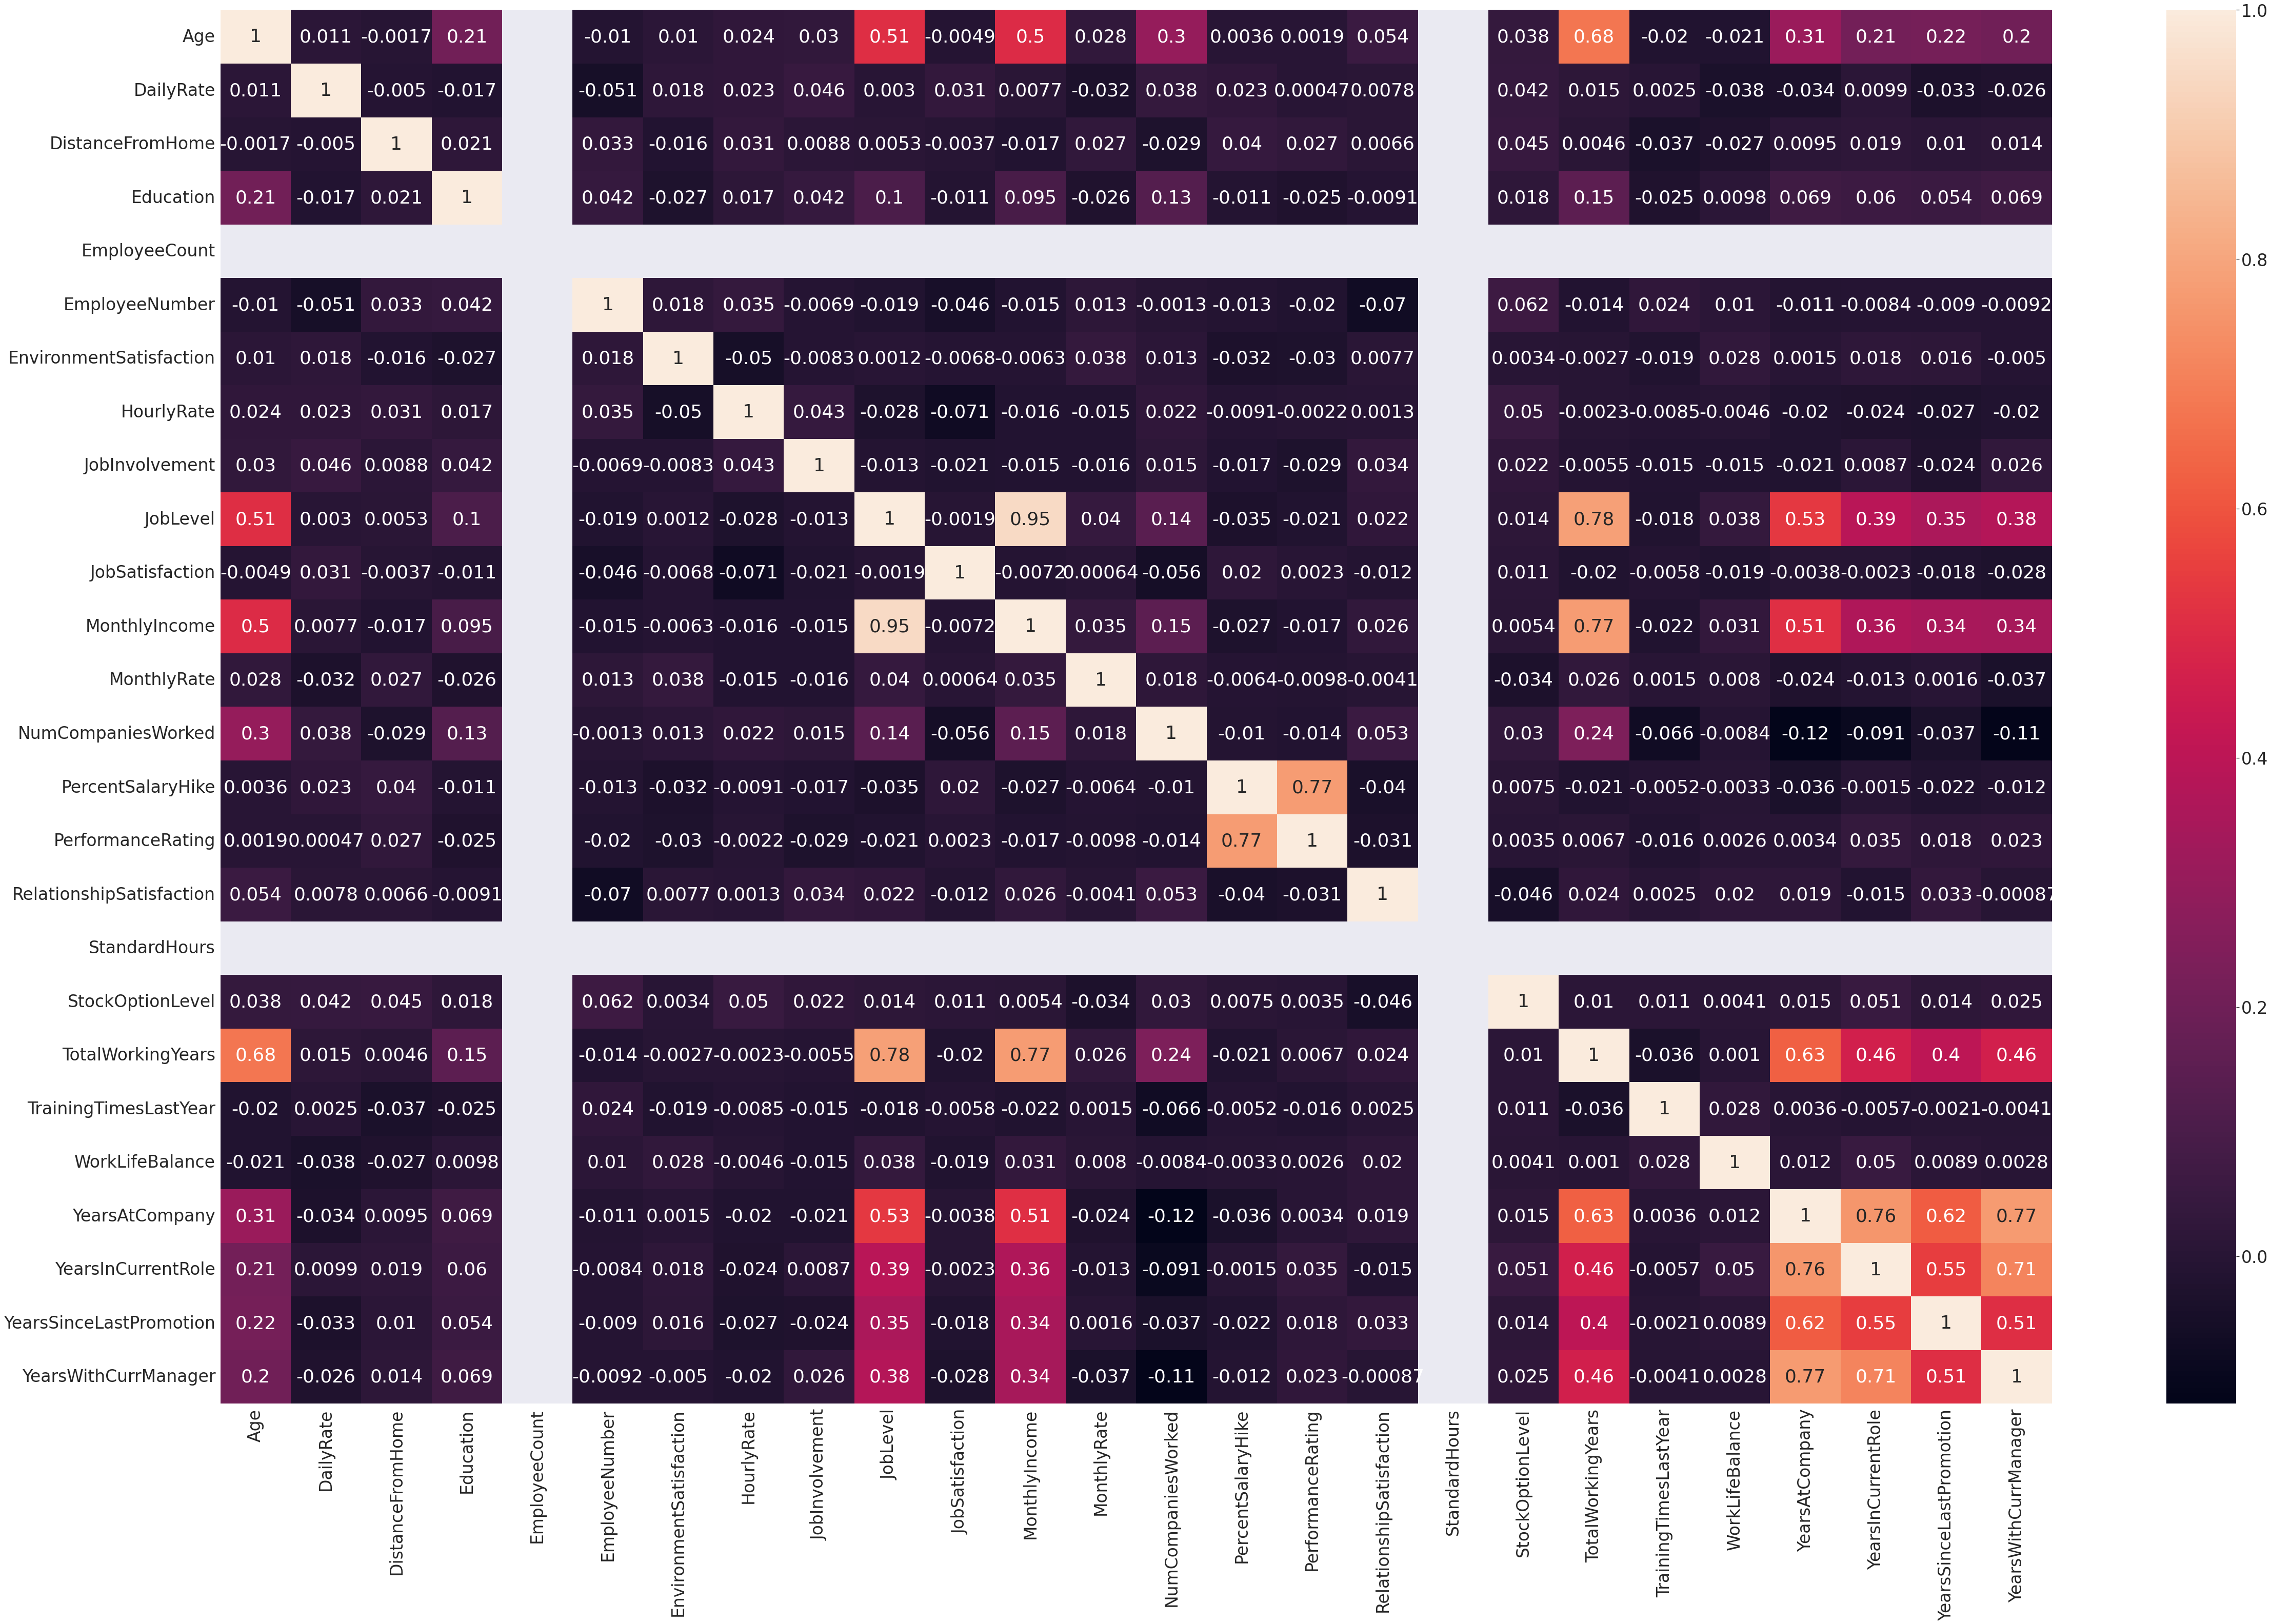

In [4]:
# Correlation matrix
plt.figure(figsize = (80,50))
sns.set(font_scale=3)
sns.heatmap(df.corr(), annot=True)
plt.show()

In [5]:
# Filter the highest correlation pairs and sort in descending order
stacked_df = df.corr().stack().sort_values(ascending=False)
stacked_df[(stacked_df > 0.6) & (stacked_df < 1)]

MonthlyIncome            JobLevel                   0.950300
JobLevel                 MonthlyIncome              0.950300
                         TotalWorkingYears          0.782208
TotalWorkingYears        JobLevel                   0.782208
PercentSalaryHike        PerformanceRating          0.773550
PerformanceRating        PercentSalaryHike          0.773550
MonthlyIncome            TotalWorkingYears          0.772893
TotalWorkingYears        MonthlyIncome              0.772893
YearsWithCurrManager     YearsAtCompany             0.769212
YearsAtCompany           YearsWithCurrManager       0.769212
YearsInCurrentRole       YearsAtCompany             0.758754
YearsAtCompany           YearsInCurrentRole         0.758754
YearsWithCurrManager     YearsInCurrentRole         0.714365
YearsInCurrentRole       YearsWithCurrManager       0.714365
TotalWorkingYears        Age                        0.680381
Age                      TotalWorkingYears          0.680381
YearsAtCompany          

* The above data shows that this is a relatively traditional company.
* For example, the longer the service, the higher the job level. They do not hire senior staff from outside, as shown in the chart below.

<AxesSubplot:xlabel='JobLevel', ylabel='TotalWorkingYears'>

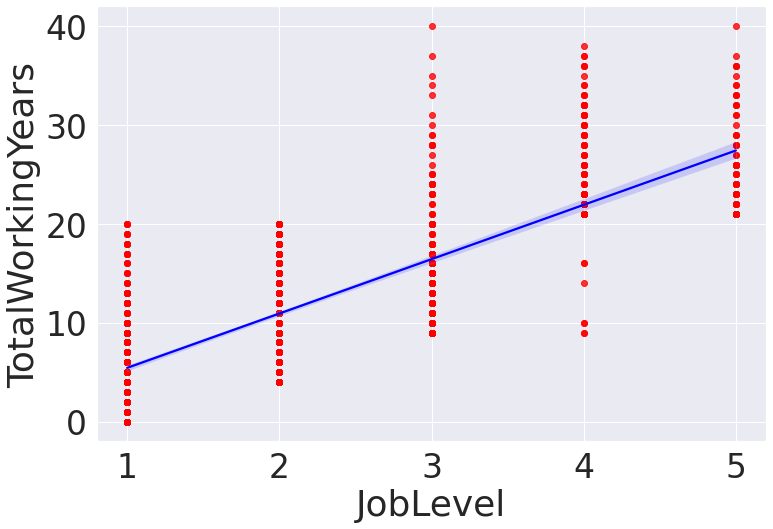

In [6]:
# Scatter Plot
sns.regplot(x='JobLevel', y='TotalWorkingYears', data=df, scatter_kws={'color':'red'}, line_kws={'color':'blue'})

In [7]:
# Numerise all attributes
df_numerised = df
for col in df_numerised.columns:
    if (df_numerised[col].dtype == 'object'):
        df_numerised[col] = df_numerised[col].astype('category').cat.codes

In [8]:
# Look at the correlation between attrition and all other factors
stacked_df_numerised = df_numerised.corr().stack().sort_values(ascending=False)
stacked_df_numerised['Attrition']

Attrition                   1.000000
OverTime                    0.246118
MaritalStatus               0.162070
DistanceFromHome            0.077924
JobRole                     0.067151
Department                  0.063991
NumCompaniesWorked          0.043494
Gender                      0.029453
EducationField              0.026846
MonthlyRate                 0.015170
PerformanceRating           0.002889
BusinessTravel              0.000074
HourlyRate                 -0.006846
EmployeeNumber             -0.010577
PercentSalaryHike          -0.013478
Education                  -0.031373
YearsSinceLastPromotion    -0.033019
RelationshipSatisfaction   -0.045872
DailyRate                  -0.056652
TrainingTimesLastYear      -0.059478
WorkLifeBalance            -0.063939
EnvironmentSatisfaction    -0.103369
JobSatisfaction            -0.103481
JobInvolvement             -0.130016
YearsAtCompany             -0.134392
StockOptionLevel           -0.137145
YearsWithCurrManager       -0.156199
A

In [9]:
# Look at the correlation between gender and all other factors
stacked_df_numerised = df_numerised.corr().stack().sort_values(ascending=False)
stacked_df_numerised['Gender']

Gender                      1.000000
JobSatisfaction             0.033252
Attrition                   0.029453
RelationshipSatisfaction    0.022868
EmployeeNumber              0.022556
JobInvolvement              0.017960
StockOptionLevel            0.012716
PercentSalaryHike           0.002733
EnvironmentSatisfaction     0.000508
HourlyRate                 -0.000478
DistanceFromHome           -0.001851
EducationField             -0.002504
WorkLifeBalance            -0.002753
DailyRate                  -0.011716
PerformanceRating          -0.013859
Education                  -0.016547
YearsSinceLastPromotion    -0.026985
YearsAtCompany             -0.029747
YearsWithCurrManager       -0.030599
MonthlyIncome              -0.031858
BusinessTravel             -0.032981
Age                        -0.036311
TrainingTimesLastYear      -0.038787
NumCompaniesWorked         -0.039147
JobLevel                   -0.039403
JobRole                    -0.039723
MonthlyRate                -0.041482
Y

<AxesSubplot:xlabel='Attrition', ylabel='OverTime'>

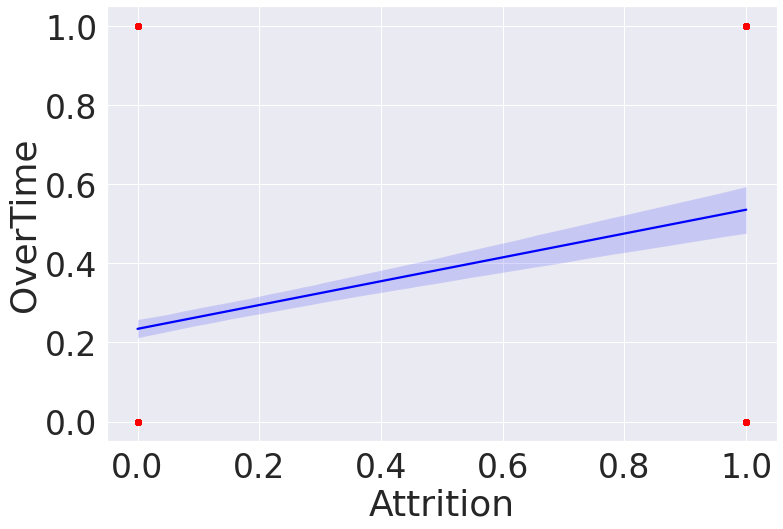

In [10]:
# The overtime hour has a slight correlation with attrition. No conclusion can be drawn
# Scatter Plot
sns.regplot(x='Attrition', y='OverTime', data=df, scatter_kws={'color':'red'}, line_kws={'color':'blue'})

Conclusion
* Monthly Income & Job Level, Total Working Years & Job Level have high correlation. This is a relatively traditional company that does not recruit high level positions from outside.
* No pronounced correlation between gender and other factors.
* No pronounced correlation between attrition and other factors.